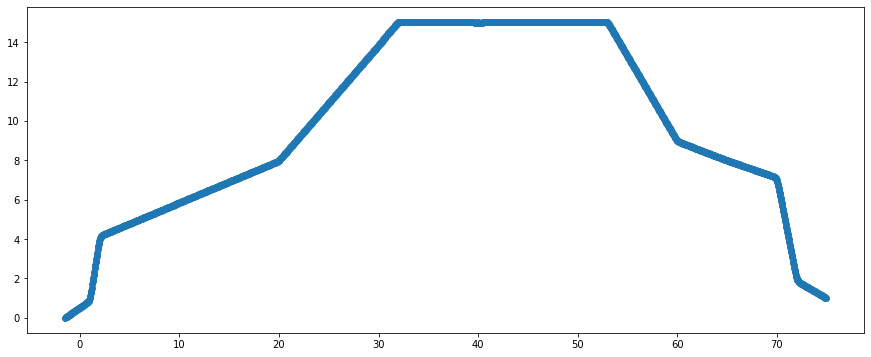

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# bunch of points t0, .., tn and y0,...,yn
t = [-1.5,1,2,20,32,40,53,60,65,70,72,75]
y = [0,1,4,8,15,15,15,9,8,7,2,1]

# points bottom
t_bot = [-1.5,-1,1,4,8,10,5,14,17.5,20,40,49,51.5,55,58.5,61,70,72,74.5,75]
y_bot = [0,-3,-4,-4.5,-6,-9,-10,-9,-9,-6,-6,-6,-9,-10,-9,-6,-6,-4,-3,1]


tau = 10
assert len(t) == len(y)
n = len(t)-1
h, a, b, g = [0 for i in range(n)], [0 for i in range(n)], [0 for i in range(n)], [0 for i in range(n)]

for i in range(n):
    h[i] = t[i+1] - t[i]
    g[i] = tau**2 *(y[i+1] - y[i])/h[i]
    a[i] = 1/h[i] - tau/np.sinh(tau*h[i])
    b[i] = tau*np.cosh(tau*h[i])/np.sinh(tau*h[i]) - 1/h[i]
    

sys = np.zeros((n+1,n+1))
for row in range(1,n):
    sys[row][row-1] = a[i-1]
    sys[row][row] = b[i-1] + b[i]
    sys[row][row+1] = a[i]
sys[0][0] = 1
sys[n][n] = 1

beta = np.zeros((n+1,1))
for i in range(1, n):
    beta[i][0] = g[i] - g[i-1]

beta = np.asmatrix(beta)
sys = np.asmatrix(sys)
z = np.linalg.inv(sys)*beta


def f(x,i):
    t1 = (z[i]*np.sinh(tau*(t[i+1]-x))) + (z[i+1]*np.sinh(tau*(x-t[i])))
    t1 = t1/(tau**2 * np.sinh(tau*h[i]))
    t2 = (y[i]-z[i]/tau**2)*(t[i+1]-x)/h[i]
    t3 = (y[i+1]-z[i+1]/tau**2)*(x-t[i])/h[i]
    return float(t1 + t2 + t3)

fx,fy = [],[]
for i in range(n):
    x_vals = np.arange(t[i], t[i+1], .05)
    y_vals = [f(x,i) for x in x_vals]
    for x in x_vals:
        fx.append(x)
    for ys in y_vals:
        fy.append(ys)
plt.figure(figsize=(15,6))
plt.scatter(fx,fy)

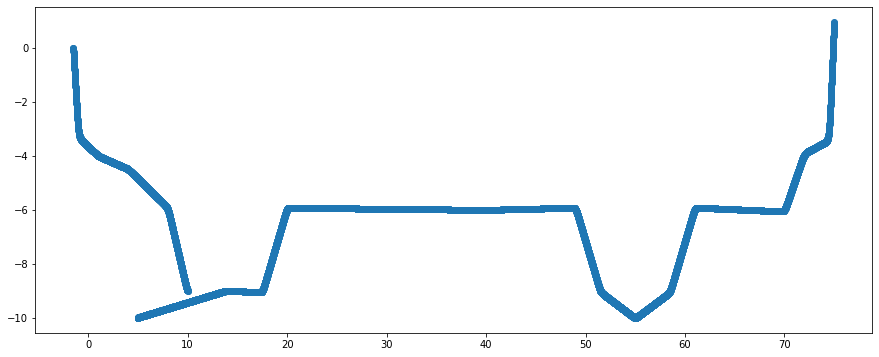

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# bunch of points t0, .., tn and y0,...,yn
t = [-1.5,-1,1,4,8,10,5,14,17.5,20,40,49,51.5,55,58.5,61,70,72,74.5,75]
y = [0,-3,-4,-4.5,-6,-9,-10,-9,-9,-6,-6,-6,-9,-10,-9,-6,-6,-4,-3,1]



tau = 10
assert len(t) == len(y)
n = len(t)-1
h, a, b, g = [0 for i in range(n)], [0 for i in range(n)], [0 for i in range(n)], [0 for i in range(n)]

for i in range(n):
    h[i] = t[i+1] - t[i]
    g[i] = tau**2 *(y[i+1] - y[i])/h[i]
    a[i] = 1/h[i] - tau/np.sinh(tau*h[i])
    b[i] = tau*np.cosh(tau*h[i])/np.sinh(tau*h[i]) - 1/h[i]
    

sys = np.zeros((n+1,n+1))
for row in range(1,n):
    sys[row][row-1] = a[i-1]
    sys[row][row] = b[i-1] + b[i]
    sys[row][row+1] = a[i]
sys[0][0] = 1
sys[n][n] = 1

beta = np.zeros((n+1,1))
for i in range(1, n):
    beta[i][0] = g[i] - g[i-1]

beta = np.asmatrix(beta)
sys = np.asmatrix(sys)
z = np.linalg.inv(sys)*beta


def f(x,i):
    t1 = (z[i]*np.sinh(tau*(t[i+1]-x))) + (z[i+1]*np.sinh(tau*(x-t[i])))
    t1 = t1/(tau**2 * np.sinh(tau*h[i]))
    t2 = (y[i]-z[i]/tau**2)*(t[i+1]-x)/h[i]
    t3 = (y[i+1]-z[i+1]/tau**2)*(x-t[i])/h[i]
    return float(t1 + t2 + t3)

fx,fy = [],[]
for i in range(n):
    x_vals = np.arange(t[i], t[i+1], .005)
    y_vals = [f(x,i) for x in x_vals]
    for x in x_vals:
        fx.append(x)
    for ys in y_vals:
        fy.append(ys)
plt.figure(figsize=(15,6))
plt.scatter(fx,fy)